In [1]:
library(dplyr)
library(ggplot2)
library(susieR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd('/nfs/lab/welison/Other_Tasks/CSE_284/Finemapping/AD')

In [3]:
AD_GWAS <- read.table('panukbb_AD/categorical-20002-both_sexes-1263_chr19.tsv', header=T)

dim(AD_GWAS)
head(AD_GWAS)

[1] 604393     10

,chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,19,218215,G,T,3.771e-05,0.0002142,-0.9723,4.6170,0.07924,true
2,19,226776,C,T,4.502e-01,0.5235000,-0.3568,0.1547,1.67600,false
3,19,229783,G,A,3.651e-01,0.3141000,0.2800,0.1629,1.06700,false
4,19,230013,C,A,3.771e-05,0.0005694,-1.0810,3.1190,0.13730,true
5,19,230130,GATC,G,3.566e-01,0.3115000,0.2301,0.1578,0.83950,false
6,19,238434,C,G,1.320e-04,0.0013290,-1.2100,2.2010,0.23470,true


In [4]:
snps <- unlist(read.table('../simulations/simulation_summary_stats/1KGP_hg19_APOE_1MB.vcf.gz_snp_maf_0.05.snp', 
           header=F))

length(snps)
snps

[1] 2714

V11           V12           V13           V14           V15 
  "rs2571154"   "rs2722667"  "rs12973197"   "rs2722668" "rs113539717" 
          V16           V17           V18           V19          V110 
  "rs2722669"  "rs35650732" "rs113403132"   "rs2571155"  "rs11667038" 
         V111          V112          V113          V114          V115 
 "rs55769227"  "rs55949136"  "rs76670664"   "rs2722670"  "rs11879778" 
         V116          V117          V118          V119          V120 
  "rs2722674"   "rs2722677"   "rs4802220"    "rs364772"   "rs1734621" 
         V121          V122          V123          V124          V125 
 "rs12986048" "rs111585617"   "rs2466416"   "rs4803707"  "rs12977629" 
         V126          V127          V128          V129          V130 
  "rs2722681"   "rs2722683"   "rs2722684"   "rs2954718"   "rs3925492" 
         V131          V132          V133          V134          V135 
  "rs2954720"   "rs2466418" "rs113688602"   "rs2722685"   "rs2722686" 
         V136          V137          V138          V139          V140 
  "rs2722687"  "rs57619526"  "rs62116265"   "rs1434573"  "rs73032401" 
         V141          V142          V143          V144          V145 
  "rs2571177"   "rs2571175"   "rs2722691"  "rs12980201"  "rs77887756" 
         V146          V147          V148          V149          V150 
  "rs7507960"   "rs2196188"   "rs2356888"   "rs2734462"   "rs2734461" 
         V151          V152          V153          V154          V155 
  "rs2734460"   "rs7246659"   "rs7246892"   "rs2734459"   "rs2734458" 
         V156          V157          V158          V159          V160 
  "rs2734457"   "rs2722693"    "rs204556"   "rs2734456"   "rs3763954" 
         V161          V162          V163          V164          V165 
  "rs2734455"   "rs1062098"   "rs2734454"   "rs2734453"   "rs2734452" 
         V166          V167          V168          V169          V170 
  "rs2722694"  "rs12984506"  "rs12983855"  "rs12984068"   "rs1369097" 
         V171          V172          V173          V174          V175 
  "rs2734451"   "rs2734450"   "rs1062093"    "rs204554"   "rs1434579" 
         V176          V177          V178          V179          V180 
 "rs59505617"  "rs57014690"  "rs12151338"   "rs2571174"   "rs8113370" 
         V181          V182          V183          V184          V185 
 "rs17347726"   "rs8101705"   "rs2722695"   "rs2571173"  "rs16979070" 
         V186          V187          V188          V189          V190 
  "rs2356889"  "rs62116266" "rs112106000"  "rs12460539"   "rs1560915" 
         V191          V192          V193          V194          V195 
 "rs12978904"   "rs8110499"   "rs4802224"  "rs11665852"   "rs7249536" 
         V196          V197          V198          V199         V1100 
  "rs7249704"  "rs11882340"  "rs35813988"    "rs204553"   "rs2571171" 
        V1101         V1102         V1103         V1104         V1105 
 "rs12978167"  "rs12977016"  "rs12983504"  "rs12983645"    "rs204552" 
        V1106         V1107         V1108         V1109         V1110 
  "rs8102733"   "rs2571170"   "rs2037904"   "rs2037903"  "rs12610672" 
        V1111         V1112         V1113         V1114         V1115 
   "rs204550"  "rs12978546"    "rs204548"    "rs204547"   "rs2571169" 
        V1116         V1117         V1118         V1119         V1120 
  "rs2571168"    "rs204545"   "rs2571167"  "rs12980701"  "rs57290748" 
        V1121         V1122         V1123         V1124         V1125 
 "rs73935674"   "rs2571166"   "rs2571165"  "rs62116270"   "rs2571164" 
        V1126         V1127         V1128         V1129         V1130 
  "rs2722697"   "rs2722698"   "rs2571163"  "rs11670301"   "rs2571162" 
        V1131         V1132         V1133         V1134         V1135 
 "rs35660276"   "rs2722699"   "rs2722700"  "rs11673449"    "rs926054" 
        V1136         V1137         V1138         V1139         V1140 
   "rs926053"   "rs2571160"    "rs926052"  "rs73935677"    "rs204544" 
        V1141         V1142       

In [9]:
r <- read.table('../simulations/1KGP_Regions/1KGP_hg19_APOE_1MB.vcf.gz.r.maf.order.ld')

colnames(r) <- snps
rownames(r) <- snps

dim(r)
r[1:5,1:5]

[1] 2714 2714

,rs2571154,rs2722667,rs12973197,rs2722668,rs113539717
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs2571154,1.000000,0.625992,0.471322,0.796007,0.214462
rs2722667,0.625992,1.000000,0.831870,0.485714,-0.281968
rs12973197,0.471322,0.831870,1.000000,0.356805,-0.270724
rs2722668,0.796007,0.485714,0.356805,1.000000,0.183298
rs113539717,0.214462,-0.281968,-0.270724,0.183298,1.000000


In [7]:
vcf_maf <- read.table('../simulations/simulation_summary_stats/1KGP_hg19_APOE_1MB.vcf.gz_snp_maf_0.05.tsv', 
                       header=F, sep='\t')

dim(vcf_maf)
head(vcf_maf)

[1] 2714 2513

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V2504,V2505,V2506,V2507,V2508,V2509,V2510,V2511,V2512,V2513
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,19,44912202,rs2571154,T,C,100,PASS,AC=3592;AF=0.717252;AN=5008;NS=2504;DP=11913;EAS_AF=0.37;AMR_AF=0.6441;AFR_AF=0.9138;EUR_AF=0.8668;SAS_AF=0.7076;AA=C|||;VT=SNP,GT,1|1,⋯,0|0,1|0,1|1,1|1,1|0,1|1,0|1,0|1,1|1,0|0
2,19,44912270,rs2722667,G,C,100,PASS,AC=2632;AF=0.525559;AN=5008;NS=2504;DP=15488;EAS_AF=0.254;AMR_AF=0.5793;AFR_AF=0.3306;EUR_AF=0.8579;SAS_AF=0.6892;AA=G|||;VT=SNP,GT,1|1,⋯,0|0,1|0,1|1,1|1,1|0,1|1,0|1,0|1,1|1,0|0
3,19,44912556,rs12973197,C,G,100,PASS,AC=2086;AF=0.416534;AN=5008;NS=2504;DP=16903;EAS_AF=0.251;AMR_AF=0.5;AFR_AF=0.1233;EUR_AF=0.7416;SAS_AF=0.59;AA=C|||;VT=SNP,GT,1|1,⋯,0|0,1|0,1|1,1|1,1|0,1|1,0|1,0|1,1|1,0|0
4,19,44912591,rs2722668,A,T,100,PASS,AC=4090;AF=0.816693;AN=5008;NS=2504;DP=17776;EAS_AF=0.5536;AMR_AF=0.7075;AFR_AF=0.9879;EUR_AF=0.8917;SAS_AF=0.8569;AA=T|||;VT=SNP,GT,1|1,⋯,1|0,1|1,1|1,1|1,1|1,1|1,0|1,0|1,1|1,0|0
5,19,44913084,rs113539717,C,T,100,PASS,AC=292;AF=0.0583067;AN=5008;NS=2504;DP=19108;EAS_AF=0.001;AMR_AF=0.036;AFR_AF=0.1982;EUR_AF=0.003;SAS_AF=0.001;AA=C|||;VT=SNP,GT,0|0,⋯,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
6,19,44913231,rs2722669,C,G,100,PASS,AC=2660;AF=0.53115;AN=5008;NS=2504;DP=18504;EAS_AF=0.254;AMR_AF=0.5821;AFR_AF=0.3502;EUR_AF=0.8579;SAS_AF=0.6892;AA=C|||;VT=SNP,GT,1|1,⋯,0|0,1|0,1|1,1|1,1|0,1|1,0|1,0|1,1|1,0|0


In [10]:
vcf_maf$snp <- paste0(vcf_maf$V1, ":", vcf_maf$V2, ":", vcf_maf$V4, ":", vcf_maf$V5)
vcf_maf_select <- select(vcf_maf, chr=V1, pos=V2, rsid=V3, ref=V4, alt=V5, snp)

dim(vcf_maf_select)
head(vcf_maf_select)

[1] 2714    6

,chr,pos,rsid,ref,alt,snp
,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,19,44912202,rs2571154,T,C,19:44912202:T:C
2,19,44912270,rs2722667,G,C,19:44912270:G:C
3,19,44912556,rs12973197,C,G,19:44912556:C:G
4,19,44912591,rs2722668,A,T,19:44912591:A:T
5,19,44913084,rs113539717,C,T,19:44913084:C:T
6,19,44913231,rs2722669,C,G,19:44913231:C:G


In [23]:
#Filter
AD_GWAS_SNP_in_R_mat <- inner_join(dplyr::filter(AD_GWAS, pos %in% vcf_maf$V2 & ref %in% c("G","A","C","T") & alt %in% c("G","A","C","T")),
          vcf_maf_select, join_by(chr,pos,ref, alt))

dim(AD_GWAS_SNP_in_R_mat)
head(AD_GWAS_SNP_in_R_mat)

[1] 2667   12

,chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,rsid,snp
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,19,44912202,T,C,0.9279,0.8822000,0.4350,0.2148,1.3680,false,rs2571154,19:44912202:T:C
2,19,44912270,G,C,0.9279,0.8781000,0.4595,0.2118,1.5220,false,rs2722667,19:44912270:G:C
3,19,44912556,C,G,0.8322,0.7788000,0.3054,0.1673,1.1680,false,rs12973197,19:44912556:C:G
4,19,44912591,A,T,0.9423,0.9175000,0.3261,0.2518,0.7092,false,rs2722668,19:44912591:A:T
5,19,44913084,C,T,0.0000,0.0008968,-1.1400,2.5350,0.1852,true,rs113539717,19:44913084:C:T
6,19,44913231,C,G,0.9278,0.8781000,0.4613,0.2122,1.5270,false,rs2722669,19:44913231:C:G


In [25]:
length(AD_GWAS_SNP_in_R_mat$rsid)
length(unique(AD_GWAS_SNP_in_R_mat$rsid))

[1] 2667

[1] 2667

In [26]:
write.table(unique(AD_GWAS_SNP_in_R_mat$rsid), 
            "panukbb_AD/snps_in_both.txt",
           col.names=F, row.names=F, quote=F)

In [27]:
write.table(unique(AD_GWAS_SNP_in_R_mat), 
            "panukbb_AD/1KG_panukbb_merged_by_position.tsv",
           col.names=F, row.names=F, quote=F, sep='\t')

# Generate ld in bash

run getting_eur_ld.txt

This required pulling out eur samples from igsr ***REMAKE THIS***

In [45]:
r <- as.matrix(data.table::fread('panukbb_AD/1KGP_hg19_APOE_1MB_EUR_PANUKBB.ld'))

rownames(r) <- unique(AD_GWAS_SNP_in_R_mat$rsid)
colnames(r) <- unique(AD_GWAS_SNP_in_R_mat$rsid)

dim(r)
r[1:5,1:5]

[1] 2667 2667

,rs2571154,rs2722667,rs12973197,rs2722668,rs113539717
rs2571154,1.0000000,0.953334,0.669607,0.8889520,0.0436719
rs2722667,0.9533340,1.000000,0.687615,0.8477880,-0.1142920
rs12973197,0.6696070,0.687615,1.000000,0.6092750,-0.1019350
rs2722668,0.8889520,0.847788,0.609275,1.0000000,0.0381491
rs113539717,0.0436719,-0.114292,-0.101935,0.0381491,1.0000000


In [49]:
snps_to_remove <- rownames(r)[is.na(r[,1])]
snps_to_keep <- rownames(r)[!is.na(r[,1])]

length(snps_to_remove)
length(snps_to_keep)

[1] 70

[1] 2597

In [51]:
r_sub <- r[snps_to_keep,snps_to_keep]

dim(r_sub)
head(r_sub)

[1] 2597 2597

,rs2571154,rs2722667,rs12973197,rs2722668,rs113539717,rs2722669,rs35650732,rs113403132,rs2571155,rs11667038,⋯,rs2336218,rs928911,rs4803817,rs10412761,rs1005165,rs967591,rs8113779,rs1046282,rs2013521,rs735482
rs2571154,1.0000000,0.953334,0.669607,0.8889520,0.0436719,0.953334,0.667862,-0.3744220,0.953334,0.0397305,⋯,0.00916821,0.018311100,-0.0286759,-0.01102830,0.01500000,0.01500000,0.02099620,-0.01538140,0.00375028,0.00375028
rs2722667,0.9533340,1.000000,0.687615,0.8477880,-0.1142920,1.000000,0.692407,-0.3563000,1.000000,0.0636050,⋯,0.00814842,0.015321500,-0.0482346,-0.02831080,0.01369010,0.01369010,0.01938390,-0.03733410,0.00686882,0.00686882
rs12973197,0.6696070,0.687615,1.000000,0.6092750,-0.1019350,0.687615,0.992257,-0.2223160,0.687615,-0.4698230,⋯,-0.01365330,-0.024709300,0.0184264,0.00963553,-0.01075150,-0.01075150,-0.00789856,0.00702266,0.00494910,0.00494910
rs2722668,0.8889520,0.847788,0.609275,1.0000000,0.0381491,0.847788,0.607753,0.0918421,0.847788,0.0291226,⋯,-0.01612180,-0.000498614,-0.0337378,-0.03397850,-0.00946851,-0.00946851,-0.00281845,-0.02251130,-0.02034110,-0.02034110
rs113539717,0.0436719,-0.114292,-0.101935,0.0381491,1.0000000,-0.114292,-0.101696,-0.0177146,-0.114292,-0.0272891,⋯,0.05026870,0.064999500,-0.0161171,0.02460970,0.05062260,0.05062260,0.05134330,0.01919250,0.01102990,0.01102990
rs2722669,0.9533340,1.000000,0.687615,0.8477880,-0.1142920,1.000000,0.692407,-0.3563000,1.000000,0.0636050,⋯,0.00814842,0.015321500,-0.0482346,-0.02831080,0.01369010,0.01369010,0.01938390,-0.03733410,0.00686882,0.00686882


In [55]:
AD_GWAS_SNP_in_R_mat_no_NA <- dplyr::filter(AD_GWAS_SNP_in_R_mat, rsid %in% snps_to_keep)

dim(AD_GWAS_SNP_in_R_mat_no_NA)
head(AD_GWAS_SNP_in_R_mat_no_NA)

[1] 2597   12

,chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,rsid,snp
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,19,44912202,T,C,0.9279,0.8822000,0.4350,0.2148,1.3680,false,rs2571154,19:44912202:T:C
2,19,44912270,G,C,0.9279,0.8781000,0.4595,0.2118,1.5220,false,rs2722667,19:44912270:G:C
3,19,44912556,C,G,0.8322,0.7788000,0.3054,0.1673,1.1680,false,rs12973197,19:44912556:C:G
4,19,44912591,A,T,0.9423,0.9175000,0.3261,0.2518,0.7092,false,rs2722668,19:44912591:A:T
5,19,44913084,C,T,0.0000,0.0008968,-1.1400,2.5350,0.1852,true,rs113539717,19:44913084:C:T
6,19,44913231,C,G,0.9278,0.8781000,0.4613,0.2122,1.5270,false,rs2722669,19:44913231:C:G


In [61]:
sum(AD_GWAS_SNP_in_R_mat_no_NA$rsid == colnames(r_sub))
sum(AD_GWAS_SNP_in_R_mat_no_NA$rsid == rownames(r_sub))

[1] 2597

[1] 2597

# Prep inputs for infinitesimal methods

In [95]:
write.table(AD_GWAS_SNP_in_R_mat_no_NA, 
            "panukbb_AD/1KG_panukbb_merged_by_position_r_na_removed.tsv",
           col.names=T, row.names=F, quote=F)

In [99]:
write.table(r_sub, 
            gzfile("panukbb_AD/1KGP_hg19_APOE_1MB_EUR_PANUKBB.ld.na.rm.gz"),
           col.names=F, row.names=F, quote=F)

# Run infinitesimal methods

python ../../tools/fine-mapping-inf/run_fine_mapping.py --sumstats 1KG_panukbb_merged_by_position_r_na_removed.tsv --beta-col-name beta_EUR --se-col-name se_EUR --ld-file 1KGP_hg19_APOE_1MB_EUR_PANUKBB.ld.na.rm.gz --n 420473 --save-tsv --output-prefix 1KG_panukbb_merged_by_position_r_na_removed_inf > AD_inf.log

# Run SuSiE

In [65]:
susie_AD <- susie_rss(bhat=AD_GWAS_SNP_in_R_mat_no_NA$beta_EUR, 
          shat=AD_GWAS_SNP_in_R_mat_no_NA$se_EUR, 
          R=r_sub, n=420473)

HINT: For large R or large XtX, consider installing the Rfast package for better performance.



In [66]:
summary(susie_AD)

,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
1476,1476,0.54003413,1
1500,1500,0.08971445,1
1496,1496,0.08151809,1
1497,1497,0.07654940,1
1498,1498,0.07565267,1
1437,1437,0.06147542,1
1501,1501,0.04745919,1
681,681,0.02583321,-1
682,682,0.02510178,-1


# Prep FINEMAP

In [100]:
AD_GWAS_SNP_in_R_mat_no_NA

chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,rsid,snp,labels,pip
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
19,44912202,T,C,9.279e-01,0.8822000,0.43500,0.2148,1.36800,false,rs2571154,19:44912202:T:C,,0.006743475
19,44912270,G,C,9.279e-01,0.8781000,0.45950,0.2118,1.52200,false,rs2722667,19:44912270:G:C,,0.007242109
19,44912556,C,G,8.322e-01,0.7788000,0.30540,0.1673,1.16800,false,rs12973197,19:44912556:C:G,,0.004984857
19,44912591,A,T,9.423e-01,0.9175000,0.32610,0.2518,0.70920,false,rs2722668,19:44912591:A:T,,0.003784249
19,44913084,C,T,0.000e+00,0.0008968,-1.14000,2.5350,0.18520,true,rs113539717,19:44913084:C:T,,0.002717071
19,44913231,C,G,9.278e-01,0.8781000,0.46130,0.2122,1.52700,false,rs2722669,19:44913231:C:G,,0.007269721
19,44913298,G,A,8.324e-01,0.7775000,0.31480,0.1674,1.22200,false,rs35650732,19:44913298:G:A,,0.005244795
19,44913426,G,A,1.442e-02,0.0353400,-0.61010,0.3777,0.97370,true,rs113403132,19:44913426:G:A,,0.005407111
19,44913456,T,G,9.279e-01,0.8781000,0.46240,0.2124,1.53100,false,rs2571155,19:44913456:T:G,,0.007289504


In [129]:
vcf_maf_for_maf <- select(vcf_maf, rsid=V3, V8)
vcf_maf_for_maf$maf <- stringr::str_extract(vcf_maf_for_maf$V8, "AF=\\d+\\.\\d+")
vcf_maf_for_maf <- select(vcf_maf_for_maf, -V8)
vcf_maf_for_maf$maf <- as.numeric(stringr::str_replace(vcf_maf_for_maf$maf, "AF=",""))
vcf_maf_for_maf$maf[vcf_maf_for_maf$maf > 0.5] <- 1-(vcf_maf_for_maf$maf[vcf_maf_for_maf$maf > 0.5])

head(vcf_maf_for_maf)

,rsid,maf
,<chr>,<dbl>
1,rs2571154,0.2827480
2,rs2722667,0.4744410
3,rs12973197,0.4165340
4,rs2722668,0.1833070
5,rs113539717,0.0583067
6,rs2722669,0.4688500


In [130]:
AD_GWAS_SNP_in_R_mat_no_NA_maf <- left_join(AD_GWAS_SNP_in_R_mat_no_NA, vcf_maf_for_maf)

sum(is.na(AD_GWAS_SNP_in_R_mat_no_NA_maf$maf))
dim(AD_GWAS_SNP_in_R_mat_no_NA_maf)
head(AD_GWAS_SNP_in_R_mat_no_NA_maf)

Joining with `by = join_by(rsid)`


[1] 0

[1] 2597   15

,chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,rsid,snp,labels,pip,maf
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,19,44912202,T,C,0.9279,0.8822000,0.4350,0.2148,1.3680,false,rs2571154,19:44912202:T:C,,0.006743475,0.2827480
2,19,44912270,G,C,0.9279,0.8781000,0.4595,0.2118,1.5220,false,rs2722667,19:44912270:G:C,,0.007242109,0.4744410
3,19,44912556,C,G,0.8322,0.7788000,0.3054,0.1673,1.1680,false,rs12973197,19:44912556:C:G,,0.004984857,0.4165340
4,19,44912591,A,T,0.9423,0.9175000,0.3261,0.2518,0.7092,false,rs2722668,19:44912591:A:T,,0.003784249,0.1833070
5,19,44913084,C,T,0.0000,0.0008968,-1.1400,2.5350,0.1852,true,rs113539717,19:44913084:C:T,,0.002717071,0.0583067
6,19,44913231,C,G,0.9278,0.8781000,0.4613,0.2122,1.5270,false,rs2722669,19:44913231:C:G,,0.007269721,0.4688500


In [131]:
write.table(select(AD_GWAS_SNP_in_R_mat_no_NA_maf, rsid, chromosome=chr,
      position=pos, allele1=ref, allele2=alt, maf=maf, 
      beta=beta_EUR, se=se_EUR),
            "panukbb_AD/1KGP_hg19_APOE_1MB_EUR_PANUKBB.ld.na.rm.finemap.z",
            col.names=T, row.names=F, quote=F, sep=' ')

In [119]:
write.table(r_sub, 
            "panukbb_AD/1KGP_hg19_APOE_1MB_EUR_PANUKBB.ld.na.rm.finemap.ld",
           col.names=F, row.names=F, quote=F)

# Read in FINEMAP results

In [134]:
finemap <- read.table("panukbb_AD/1KGP_hg19_APOE_1MB_EUR_PANUKBB.ld.na.rm.finemap.snp", header=T)

dim(finemap)
head(finemap)

[1] 2597   16

,index,rsid,chromosome,position,allele1,allele2,maf,beta,se,z,prob,log10bf,mean,sd,mean_incl,sd_incl
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1476,rs429358,19,45411941,T,C,0.150559,1.310,0.2155,6.07889,0.5633580,3.32690,0.01043960,0.00947247,0.0185310,0.00305460
2,1500,rs814573,19,45424351,A,T,0.264177,1.144,0.1992,5.74297,0.0790915,2.15015,0.00112412,0.00389931,0.0142129,0.00249240
3,1496,rs12721051,19,45422160,C,G,0.113618,1.114,0.1945,5.72751,0.0728800,2.11171,0.00143589,0.00520596,0.0197021,0.00346272
4,1437,rs6857,19,45392254,C,T,0.110423,1.170,0.2042,5.72968,0.0728128,2.11128,0.00145090,0.00526346,0.0199265,0.00351142
5,1497,rs56131196,19,45422846,G,A,0.150759,1.110,0.1942,5.71576,0.0681368,2.08027,0.00118813,0.00446646,0.0174375,0.00307170
6,1498,rs4420638,19,45422946,A,G,0.150958,1.109,0.1941,5.71355,0.0672818,2.07438,0.00117213,0.00443624,0.0174212,0.00307015


In [135]:
finemap$labels <- ""
finemap$labels[finemap$rsid=='rs7412'] <- 'rs7412'
finemap$labels[finemap$rsid=='rs429358'] <- 'rs429358'

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


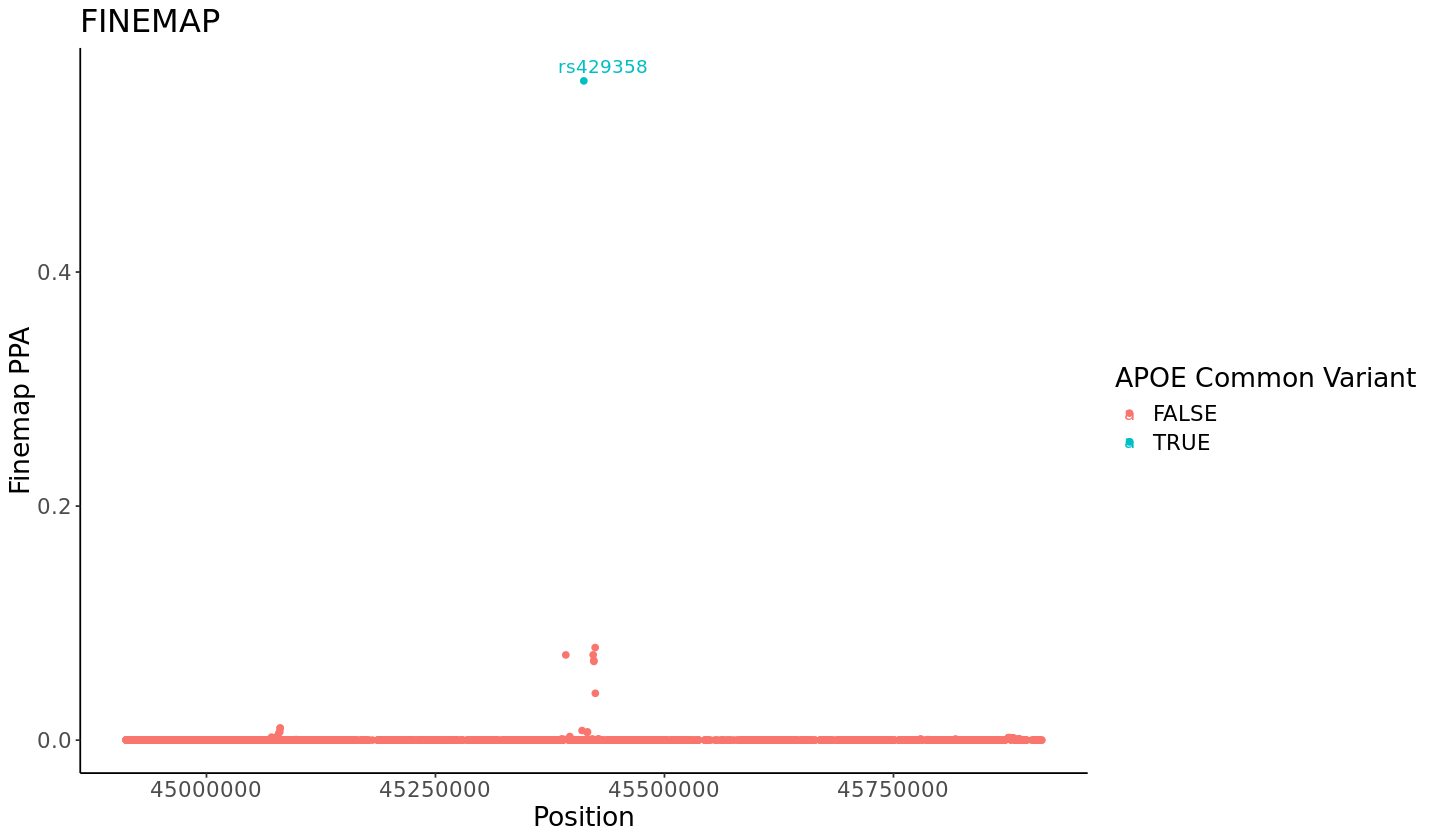

In [136]:
options(repr.plot.width = 12)
ggplot(finemap, aes(x=position, y=prob, 
                                       color=rsid %in% c('rs7412','rs429358'), label=labels)) + 
    geom_point() + theme_classic() + theme(text = element_text(size=16)) + 
    xlab('Position') + ylab('Finemap PPA') + labs(color="APOE Common Variant") +
    ggtitle("FINEMAP") +
    geom_text_repel(max.overlaps=40)

In [162]:
filter(finemap, rsid %in% c('rs7412','rs429358'))

index,rsid,chromosome,position,allele1,allele2,maf,beta,se,z,prob,log10bf,mean,sd,mean_incl,sd_incl,labels
<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1476,rs429358,19,45411941,T,C,0.1505590,1.3100,0.2155,6.07889,5.63358e-01,3.32690,1.04396e-02,9.47247e-03,0.01853100,0.00305460,rs429358
1477,rs7412,19,45412079,C,T,0.0750799,-0.5685,0.2548,-2.23116,3.85499e-05,-1.19772,-2.62458e-07,4.95442e-05,-0.00680827,0.00416214,rs7412


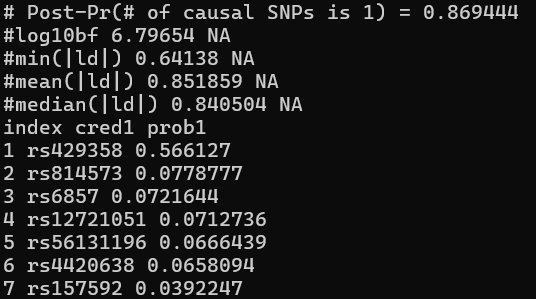

Highest probability is one credible set with 7 members, primarily driven by this specific APOE SNP

# SuSiE-Inf

In [143]:
susie.inf <- read.table('panukbb_AD/1KG_panukbb_merged_by_position_r_na_removed_inf.susieinf.bgz', header=T, sep='\t')

dim(susie.inf)
head(susie.inf)

[1] 2597   60

,chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,⋯,lbf_variable6,lbf_variable7,lbf_variable8,lbf_variable9,lbf_variable10,alpha,post_mean,tausq,sigmasq,cs
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,19,44912202,T,C,0.9279,0.8822000,0.4350,0.2148,1.3680,False,⋯,0.7832477,0.7833151,0.7833328,0.7833153,0.7832837,1.146156e-05,3.215842e-05,9.664262e-09,0.9998759,-1
2,19,44912270,G,C,0.9279,0.8781000,0.4595,0.2118,1.5220,False,⋯,0.9019407,0.9020110,0.9020275,0.9020061,0.9019696,1.195307e-05,3.625951e-05,9.664262e-09,0.9998759,-1
3,19,44912556,C,G,0.8322,0.7788000,0.3054,0.1673,1.1680,False,⋯,0.3119188,0.3119583,0.3119763,0.3119845,0.3119972,9.165093e-06,1.962809e-05,9.664262e-09,0.9998759,-1
4,19,44912591,A,T,0.9423,0.9175000,0.3261,0.2518,0.7092,False,⋯,-0.1677095,-0.1676725,-0.1676581,-0.1676603,-0.1676701,6.266989e-06,1.064729e-05,9.664262e-09,0.9998759,-1
5,19,44913084,C,T,0.0000,0.0008968,-1.1400,2.5350,0.1852,True,⋯,-0.6134699,-0.6134702,-0.6134701,-0.6134694,-0.6134683,-4.189122e-07,-6.049384e-07,9.664262e-09,0.9998759,-1
6,19,44913231,C,G,0.9278,0.8781000,0.4613,0.2122,1.5270,False,⋯,0.9086787,0.9087492,0.9087656,0.9087442,0.9087076,1.198061e-05,3.650715e-05,9.664262e-09,0.9998759,-1


In [145]:
susie.inf$labels <- ""
susie.inf$labels[susie.inf$rsid=='rs7412'] <- 'rs7412'
susie.inf$labels[susie.inf$rsid=='rs429358'] <- 'rs429358'

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


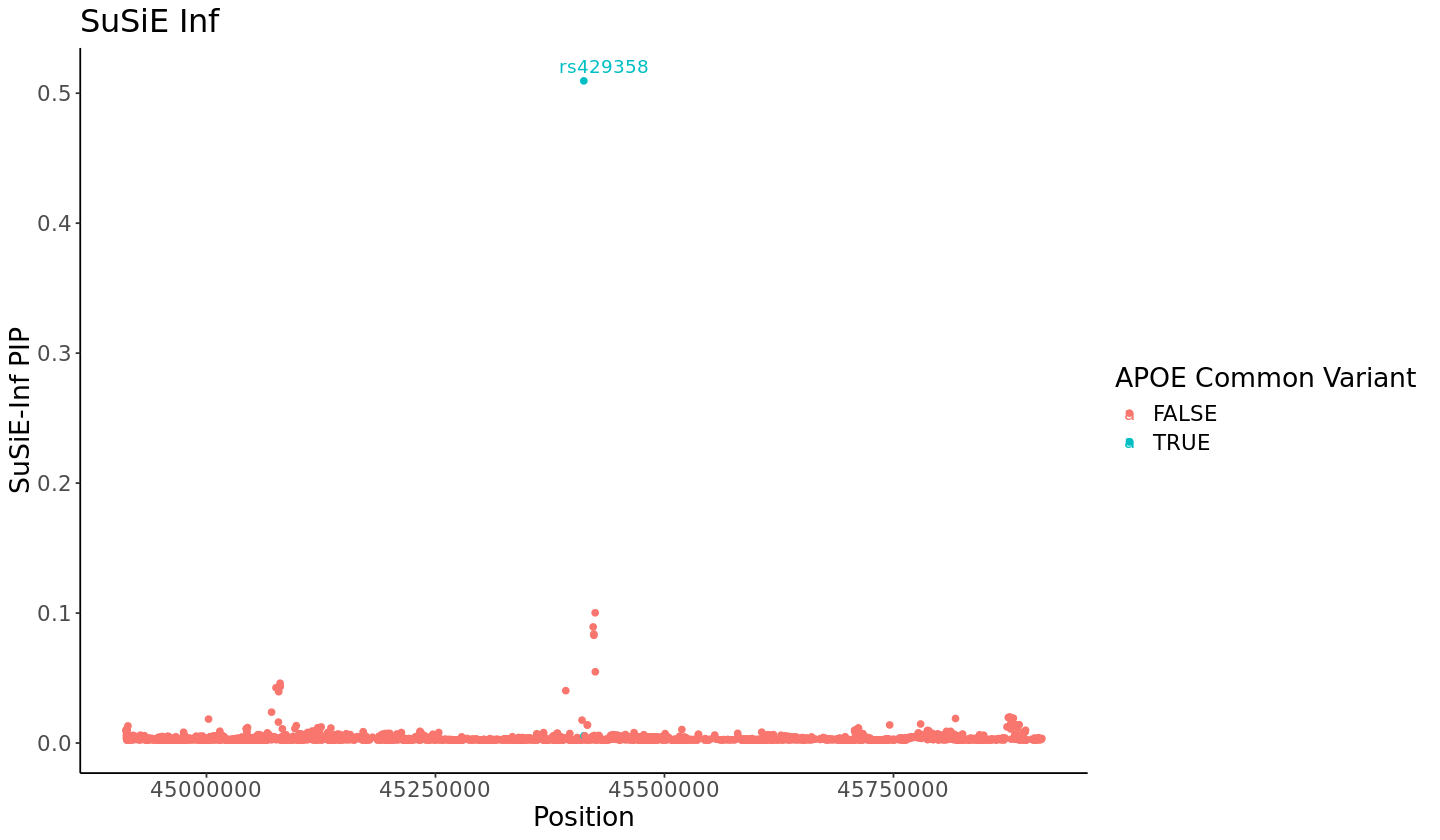

In [161]:
options(repr.plot.width = 12)
ggplot(susie.inf, aes(x=pos, y=prob, 
                                       color=rsid%in%c('rs7412','rs429358'), label=labels)) + 
    geom_point() + theme_classic() + theme(text = element_text(size=16)) + 
    xlab('Position') + ylab('SuSiE-Inf PIP') + labs(color="APOE Common Variant") +
    ggtitle("SuSiE Inf") +
    geom_text_repel(max.overlaps=40)

In [156]:
select(susie.inf[which(!is.na(susie.inf$pip)),], chr, pos, ref, alt, rsid, pip, prob, cs)

,chr,pos,ref,alt,rsid,pip,prob,cs
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
1476,19,45411941,T,C,rs429358,0.540034132,0.509472875,1
1477,19,45412079,C,T,rs7412,0.004462033,0.005552359,-1


In [172]:
filter(susie.inf, rsid %in% c('rs7412','rs429358')) %>%
    select(-contains("lbf"), -contains('omega'), -contains('mu'), -contains('alpha'))

filter(susie.inf, rsid %in% c('rs7412','rs429358')) %>%
    select(rsid, chr, pos, ref, alt, beta_EUR, se_EUR, neglog10_pval_EUR,
          prob, cs)

filter(susie.inf, cs != -1) %>%
    select(rsid, chr, pos, ref, alt, beta_EUR, se_EUR, neglog10_pval_EUR,
          prob, cs) %>%
    arrange(-prob)

chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,rsid,snp,labels,pip,prob,post_mean,tausq,sigmasq,cs
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
19,45411941,T,C,0.32690,0.15600,1.3100,0.2155,8.915,False,rs429358,19:45411941:T:C,rs429358,0.540034132,0.509472875,4.636661e-03,9.664262e-09,0.9998759,1
19,45412079,C,T,0.03846,0.08074,-0.5685,0.2548,1.590,False,rs7412,19:45412079:C:T,rs7412,0.004462033,0.005552359,-1.949905e-05,9.664262e-09,0.9998759,-1


rsid,chr,pos,ref,alt,beta_EUR,se_EUR,neglog10_pval_EUR,prob,cs
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
rs429358,19,45411941,T,C,1.3100,0.2155,8.915,0.509472875,1
rs7412,19,45412079,C,T,-0.5685,0.2548,1.590,0.005552359,-1


rsid,chr,pos,ref,alt,beta_EUR,se_EUR,neglog10_pval_EUR,prob,cs
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
rs429358,19,45411941,T,C,1.310,0.2155,8.915,0.50947288,1
rs814573,19,45424351,A,T,1.144,0.1992,8.034,0.10020612,1
rs12721051,19,45422160,C,G,1.114,0.1945,7.990,0.08934403,1
rs56131196,19,45422846,G,A,1.110,0.1942,7.966,0.08386956,1
rs4420638,19,45422946,A,G,1.109,0.1941,7.957,0.08288159,1
rs157592,19,45424514,A,C,1.116,0.1985,7.729,0.05482680,1
rs6857,19,45392254,C,T,1.170,0.2042,8.003,0.04030486,1
rs769449,19,45410002,G,A,1.246,0.2325,7.078,0.01760337,1


# FINEMAP-Inf

In [157]:
finemap.inf <- read.table('panukbb_AD/1KG_panukbb_merged_by_position_r_na_removed_inf.finemapinf.bgz', header=T, sep='\t')

dim(finemap.inf)
head(finemap.inf)

[1] 2597   21

,chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,⋯,snp,labels,pip,prob,post_mean_cond,post_sd_cond,alpha,post_mean,tausq,sigmasq
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19,44912202,T,C,0.9279,0.8822000,0.4350,0.2148,1.3680,False,⋯,19:44912202:T:C,0.00674347460359526,NA,1.251325e-04,0.0036806759,0.001665407,1.266508e-05,1.312565e-05,9.664262e-09,0.9998759
2,19,44912270,G,C,0.9279,0.8781000,0.4595,0.2118,1.5220,False,⋯,19:44912270:G:C,0.00724210860990149,NA,1.537610e-04,0.0038405336,0.001665449,1.315874e-05,1.374927e-05,9.664262e-09,0.9998759
3,19,44912556,C,G,0.8322,0.7788000,0.3054,0.1673,1.1680,False,⋯,19:44912556:C:G,0.00498485697354256,NA,5.514633e-05,0.0029950453,0.001676233,1.025171e-05,1.041688e-05,9.664262e-09,0.9998759
4,19,44912591,A,T,0.9423,0.9175000,0.3261,0.2518,0.7092,False,⋯,19:44912591:A:T,0.00378424939496125,NA,2.513743e-05,0.0021233693,0.001656356,7.361602e-06,7.414978e-06,9.664262e-09,0.9998759
5,19,44913084,C,T,0.0000,0.0008968,-1.1400,2.5350,0.1852,True,⋯,19:44913084:C:T,0.00271707130172538,NA,1.058265e-05,-0.0001809607,0.001568846,-6.974486e-07,-6.993636e-07,9.664262e-09,0.9998759
6,19,44913231,C,G,0.9278,0.8781000,0.4613,0.2122,1.5270,False,⋯,19:44913231:C:G,0.0072697209667929,NA,1.554544e-04,0.0038485652,0.001665450,1.318628e-05,1.378455e-05,9.664262e-09,0.9998759


In [158]:
finemap.inf$labels <- ""
finemap.inf$labels[finemap.inf$rsid=='rs7412'] <- 'rs7412'
finemap.inf$labels[finemap.inf$rsid=='rs429358'] <- 'rs429358'

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


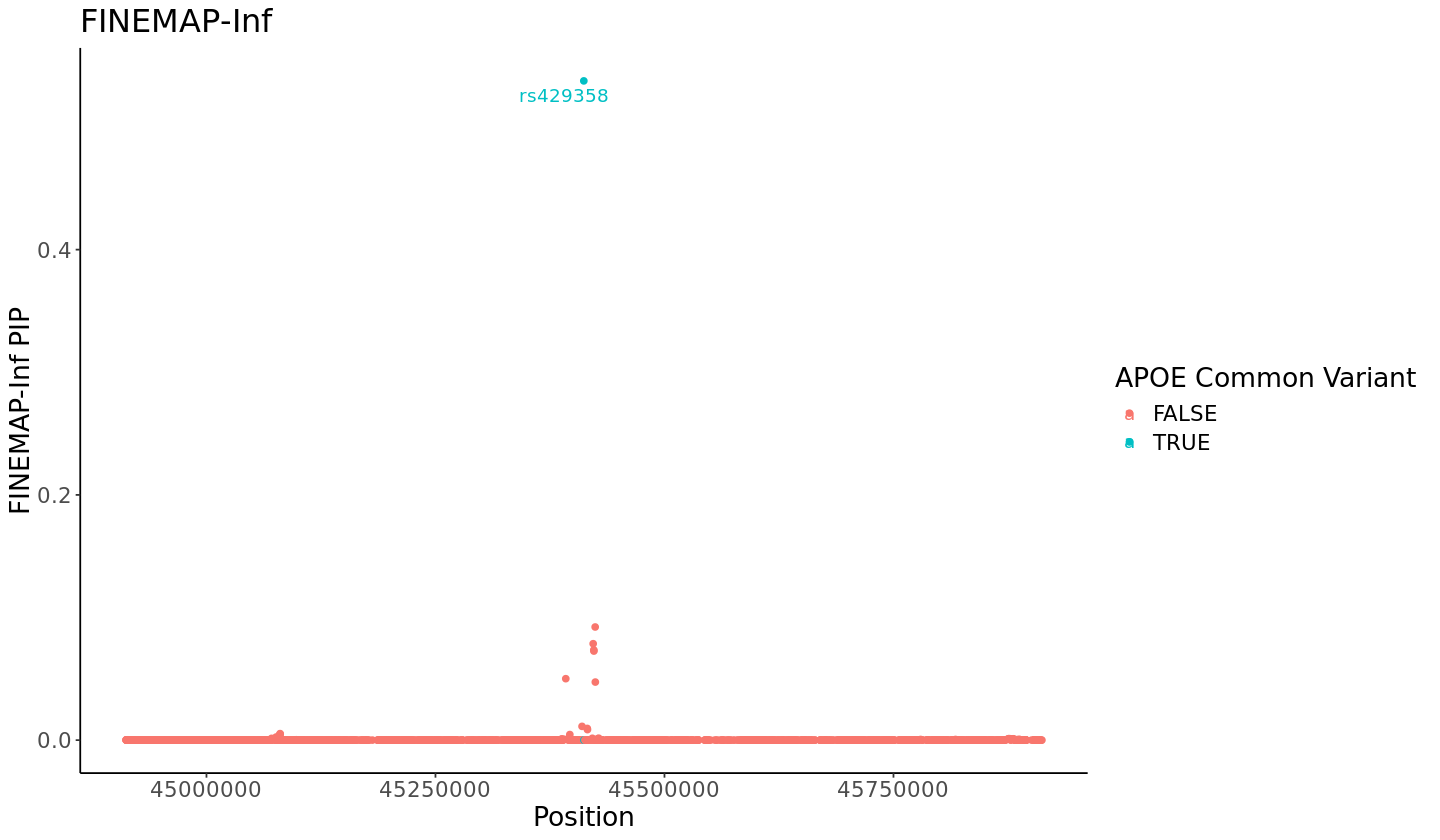

In [160]:
options(repr.plot.width = 12)
ggplot(finemap.inf, aes(x=pos, y=prob, 
                                       color=rsid%in%c('rs7412','rs429358'), label=labels)) + 
    geom_point() + theme_classic() + theme(text = element_text(size=16)) + 
    xlab('Position') + ylab('FINEMAP-Inf PIP') + labs(color="APOE Common Variant") +
    ggtitle("FINEMAP-Inf") +
    geom_text_repel(max.overlaps=40)

In [177]:
filter(finemap.inf, rsid %in% c('rs7412','rs429358')) %>%
    select(-contains("lbf"), -contains('omega'), -contains('mu'), -contains('alpha'))

filter(finemap.inf, rsid %in% c('rs7412','rs429358')) %>%
    select(rsid, chr, pos, ref, alt, beta_EUR, se_EUR, neglog10_pval_EUR,
          prob)

chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,rsid,snp,labels,pip,prob,post_mean_cond,post_sd_cond,post_mean,tausq,sigmasq
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,45411941,T,C,0.32690,0.15600,1.3100,0.2155,8.915,False,rs429358,19:45411941:T:C,rs429358,0.540034132,5.376274e-01,0.009404088,0.001637378,5.060012e-03,9.664262e-09,0.9998759
19,45412079,C,T,0.03846,0.08074,-0.5685,0.2548,1.590,False,rs7412,19:45412079:C:T,rs7412,0.004462033,4.246443e-05,-0.002805262,0.001620872,-9.671381e-06,9.664262e-09,0.9998759


rsid,chr,pos,ref,alt,beta_EUR,se_EUR,neglog10_pval_EUR,prob
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
rs429358,19,45411941,T,C,1.3100,0.2155,8.915,5.376274e-01
rs7412,19,45412079,C,T,-0.5685,0.2548,1.590,4.246443e-05


# Summary Stats

In [68]:
AD_GWAS_SNP_in_R_mat_no_NA

chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,rsid,snp
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
19,44912202,T,C,9.279e-01,0.8822000,0.43500,0.2148,1.36800,false,rs2571154,19:44912202:T:C
19,44912270,G,C,9.279e-01,0.8781000,0.45950,0.2118,1.52200,false,rs2722667,19:44912270:G:C
19,44912556,C,G,8.322e-01,0.7788000,0.30540,0.1673,1.16800,false,rs12973197,19:44912556:C:G
19,44912591,A,T,9.423e-01,0.9175000,0.32610,0.2518,0.70920,false,rs2722668,19:44912591:A:T
19,44913084,C,T,0.000e+00,0.0008968,-1.14000,2.5350,0.18520,true,rs113539717,19:44913084:C:T
19,44913231,C,G,9.278e-01,0.8781000,0.46130,0.2122,1.52700,false,rs2722669,19:44913231:C:G
19,44913298,G,A,8.324e-01,0.7775000,0.31480,0.1674,1.22200,false,rs35650732,19:44913298:G:A
19,44913426,G,A,1.442e-02,0.0353400,-0.61010,0.3777,0.97370,true,rs113403132,19:44913426:G:A
19,44913456,T,G,9.279e-01,0.8781000,0.46240,0.2124,1.53100,false,rs2571155,19:44913456:T:G


In [71]:
sum(AD_GWAS_SNP_in_R_mat_no_NA$rsid == 'rs7412')
sum(AD_GWAS_SNP_in_R_mat_no_NA$rsid == 'rs429358')

[1] 1

[1] 1

In [77]:
AD_GWAS_SNP_in_R_mat_no_NA$labels <- ""
AD_GWAS_SNP_in_R_mat_no_NA$labels[AD_GWAS_SNP_in_R_mat_no_NA$rsid=='rs7412'] <- 'rs7412'
AD_GWAS_SNP_in_R_mat_no_NA$labels[AD_GWAS_SNP_in_R_mat_no_NA$rsid=='rs429358'] <- 'rs429358'

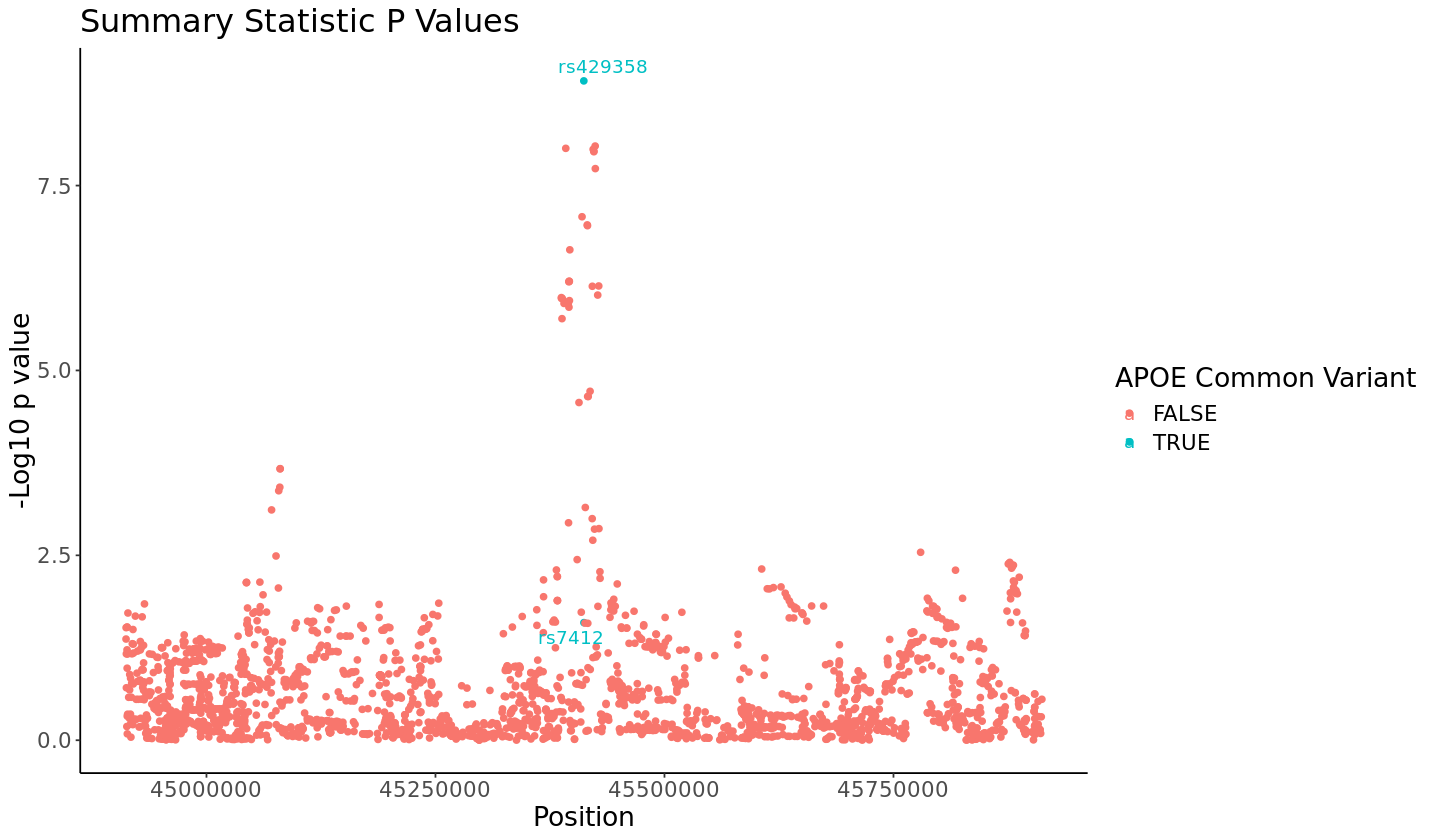

In [88]:
options(repr.plot.width = 12)
ggplot(AD_GWAS_SNP_in_R_mat_no_NA, aes(x=pos, y=neglog10_pval_EUR, 
                                       color=rsid%in%c('rs7412','rs429358'), label=labels)) + 
    geom_point() + theme_classic() + theme(text = element_text(size=16)) + 
    xlab('Position') + ylab('-Log10 p value') + labs(color="APOE Common Variant") +
    ggtitle("Summary Statistic P Values") +
    geom_text_repel(max.overlaps=40)

In [179]:
filter(AD_GWAS_SNP_in_R_mat_no_NA, rsid %in% c('rs7412','rs429358')) %>%
    select(-contains("lbf"), -contains('omega'), -contains('mu'), -contains('alpha'))

filter(AD_GWAS_SNP_in_R_mat_no_NA, rsid %in% c('rs7412','rs429358')) %>%
    select(rsid, chr, pos, ref, alt, beta_EUR, se_EUR, neglog10_pval_EUR)

chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,rsid,snp,labels,pip
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
19,45411941,T,C,0.32690,0.15600,1.3100,0.2155,8.915,false,rs429358,19:45411941:T:C,rs429358,0.540034132
19,45412079,C,T,0.03846,0.08074,-0.5685,0.2548,1.590,false,rs7412,19:45412079:C:T,rs7412,0.004462033


rsid,chr,pos,ref,alt,beta_EUR,se_EUR,neglog10_pval_EUR
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
rs429358,19,45411941,T,C,1.3100,0.2155,8.915
rs7412,19,45412079,C,T,-0.5685,0.2548,1.590


# SuSiE

In [89]:
AD_GWAS_SNP_in_R_mat_no_NA$pip <- susie_AD$pip

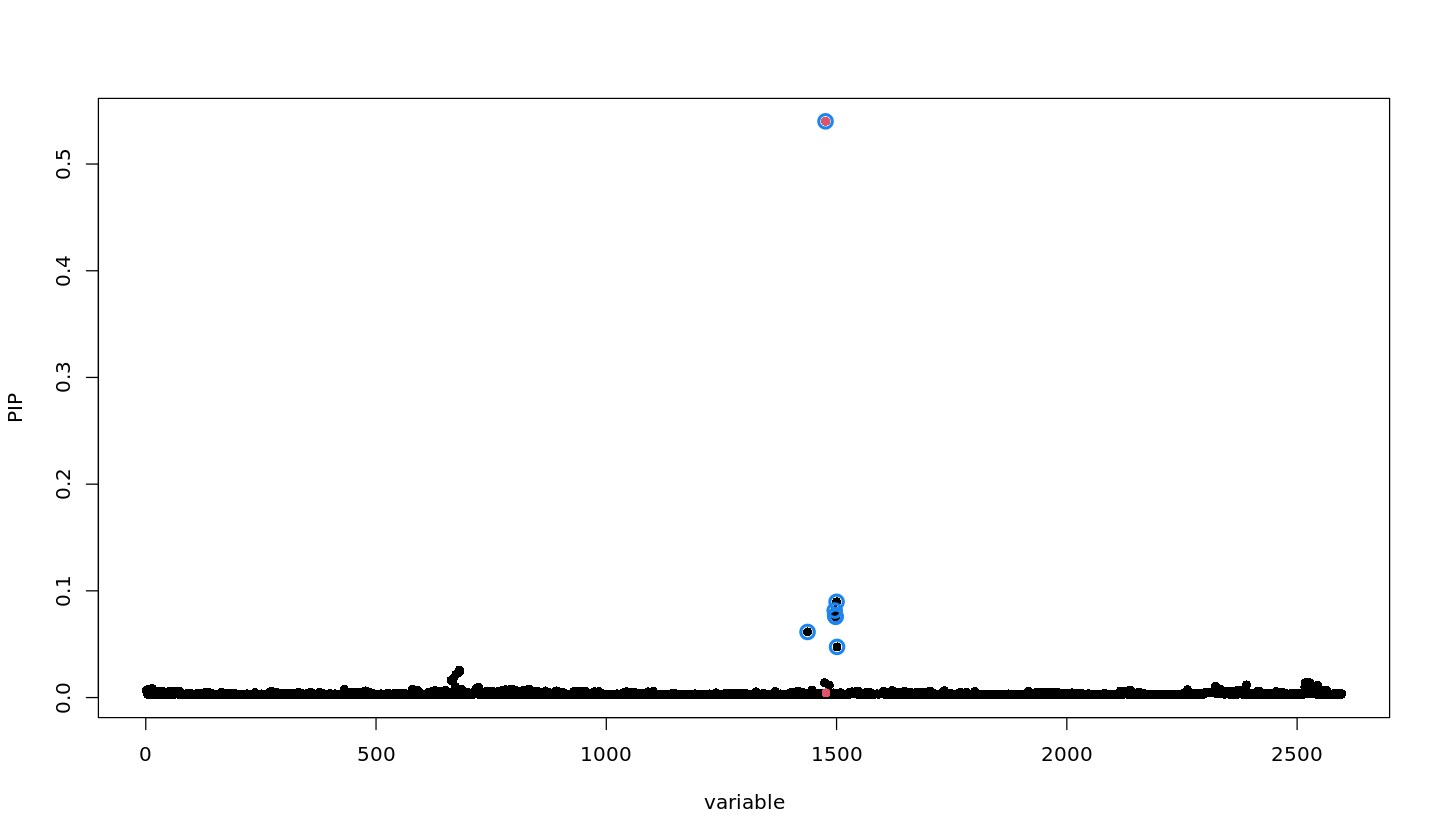

In [96]:
susie_plot(susie_AD, y="PIP", b=(AD_GWAS_SNP_in_R_mat_no_NA$rsid %in% c('rs7412','rs429358')))

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


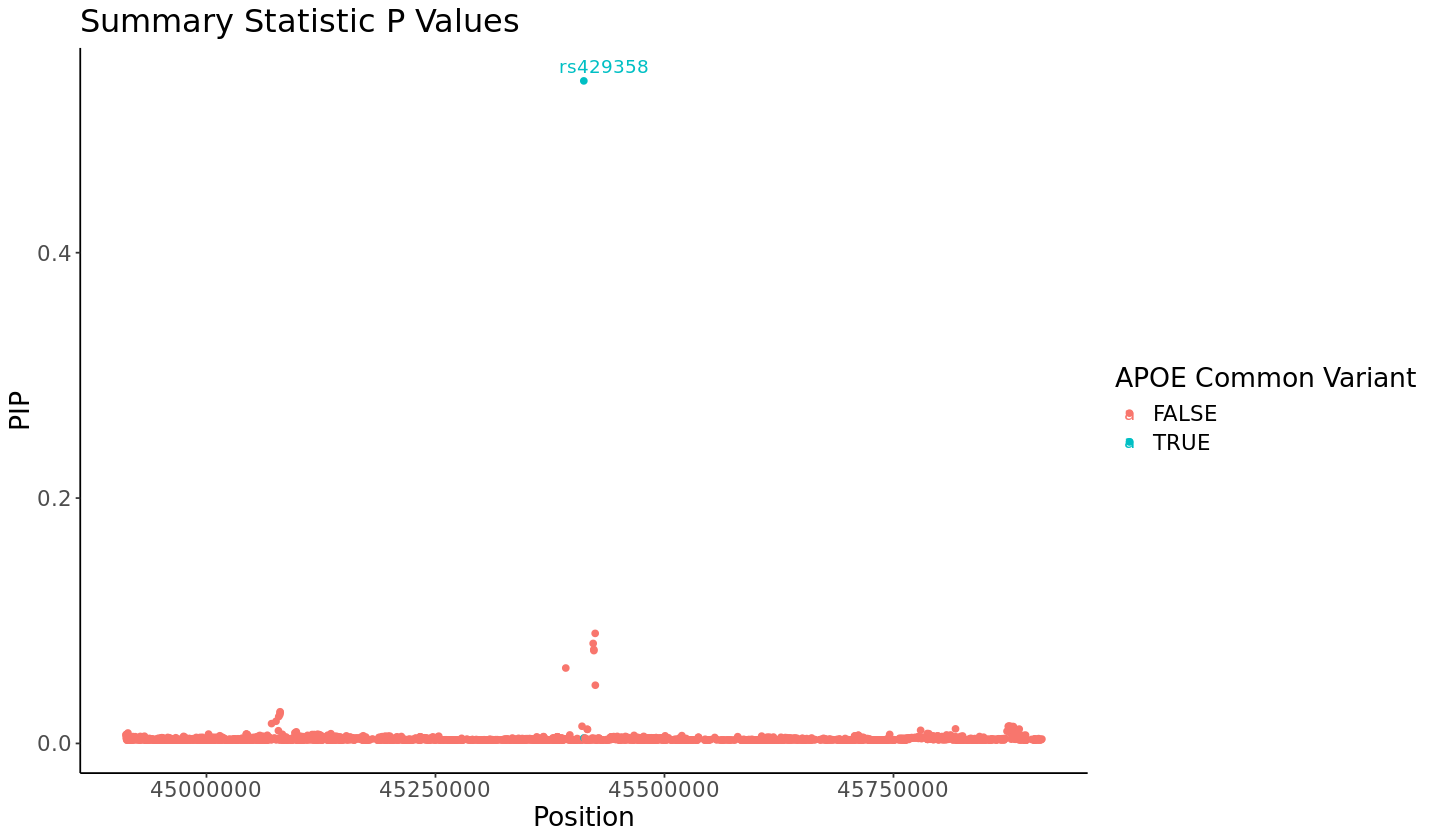

In [90]:
options(repr.plot.width = 12)
ggplot(AD_GWAS_SNP_in_R_mat_no_NA, aes(x=pos, y=pip, 
                                       color=rsid%in%c('rs7412','rs429358'), label=labels)) + 
    geom_point() + theme_classic() + theme(text = element_text(size=16)) + 
    xlab('Position') + ylab('PIP') + labs(color="APOE Common Variant") +
    ggtitle("Summary Statistic P Values") +
    geom_text_repel(max.overlaps=40)

In [185]:
filter(AD_GWAS_SNP_in_R_mat_no_NA, rsid %in% c('rs7412','rs429358')) %>%
    select(-contains("lbf"), -contains('omega'), -contains('mu'), -contains('alpha'))

filter(AD_GWAS_SNP_in_R_mat_no_NA, rsid %in% c('rs7412','rs429358')) %>%
    select(rsid, chr, pos, ref, alt, beta_EUR, se_EUR, neglog10_pval_EUR,
          pip)

chr,pos,ref,alt,af_cases_EUR,af_controls_EUR,beta_EUR,se_EUR,neglog10_pval_EUR,low_confidence_EUR,rsid,snp,labels,pip
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
19,45411941,T,C,0.32690,0.15600,1.3100,0.2155,8.915,false,rs429358,19:45411941:T:C,rs429358,0.540034132
19,45412079,C,T,0.03846,0.08074,-0.5685,0.2548,1.590,false,rs7412,19:45412079:C:T,rs7412,0.004462033


rsid,chr,pos,ref,alt,beta_EUR,se_EUR,neglog10_pval_EUR,pip
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
rs429358,19,45411941,T,C,1.3100,0.2155,8.915,0.540034132
rs7412,19,45412079,C,T,-0.5685,0.2548,1.590,0.004462033


In [186]:
summary(susie_AD)

,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
1476,1476,0.54003413,1
1500,1500,0.08971445,1
1496,1496,0.08151809,1
1497,1497,0.07654940,1
1498,1498,0.07565267,1
1437,1437,0.06147542,1
1501,1501,0.04745919,1
681,681,0.02583321,-1
682,682,0.02510178,-1


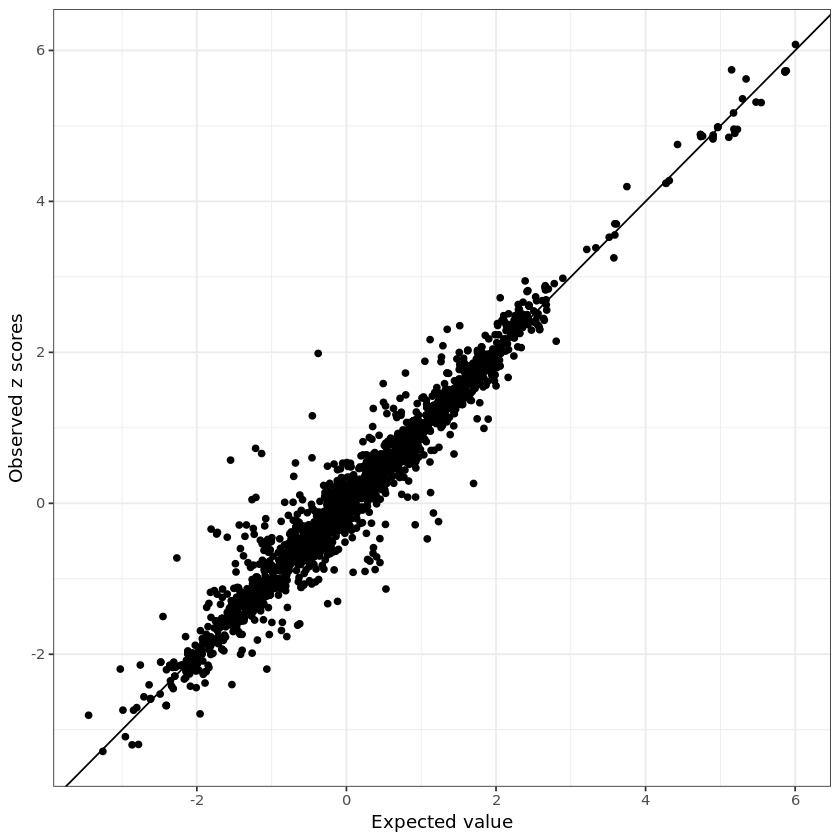

In [63]:
condz_in = kriging_rss(AD_GWAS_SNP_in_R_mat_no_NA$beta_EUR/AD_GWAS_SNP_in_R_mat_no_NA$se_EUR, r_sub, n=420473)
condz_in$plot